In [1]:
#Date and Time Data Types and Tools

In [2]:
from datetime import datetime

In [5]:
now=datetime.now()
now

datetime.datetime(2020, 7, 19, 11, 46, 11, 483273)

In [10]:
now.year, now.month, now.day

(2020, 7, 19)

In [17]:
delta =datetime.now()- datetime(2020, 6, 3) 
delta

datetime.timedelta(days=46, seconds=42518, microseconds=947252)

In [19]:
delta.days,delta.seconds

(46, 42518)

In [20]:
from datetime import timedelta

In [21]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [22]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [30]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [33]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [36]:
# convert strings to dates using datetime.strptime
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')


datetime.datetime(2011, 1, 3, 0, 0)

In [42]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [43]:
#dateutil is capable of parsing almost any human-intelligible date representation
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [44]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [45]:
?parse

In [46]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [47]:
datestrs

['7/6/2011', '8/6/2011']

In [49]:
import pandas as pd

In [50]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [51]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [53]:
idx[1]

Timestamp('2011-08-06 00:00:00')

In [59]:
pd.isnull(idx)

array([False, False,  True])

In [60]:
#Time Series Basics

In [67]:
from datetime import datetime
from pandas import Series
import numpy as np

In [62]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [63]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [69]:
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.156216
2011-01-05    0.907263
2011-01-07    2.117105
2011-01-08   -0.579771
2011-01-10    1.765204
2011-01-12   -1.021894
dtype: float64

In [72]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [73]:
ts[::2]

2011-01-02    0.156216
2011-01-07    2.117105
2011-01-10    1.765204
dtype: float64

In [74]:
ts+ts[::2]

2011-01-02    0.312432
2011-01-05         NaN
2011-01-07    4.234211
2011-01-08         NaN
2011-01-10    3.530409
2011-01-12         NaN
dtype: float64

In [75]:
ts.index.dtype

dtype('<M8[ns]')

In [76]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [77]:
stamp=ts.index[2]
ts[stamp]

2.1171053204089914

In [80]:
ts['1/10/2011'],ts['2011-01-10 '],ts['20110110']

(1.7652043634190997, 1.7652043634190997, 1.7652043634190997)

In [81]:
longer_ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01    0.333905
2000-01-02    0.653296
2000-01-03   -0.275751
2000-01-04   -0.050643
2000-01-05    1.113447
2000-01-06   -0.117518
2000-01-07   -1.848201
2000-01-08    0.685615
2000-01-09    1.915017
2000-01-10   -0.896596
Freq: D, dtype: float64

In [83]:
longer_ts['2001'],longer_ts['2000-2']

(2001-01-01   -1.546528
 2001-01-02   -1.199105
 2001-01-03   -0.589455
 2001-01-04    0.653745
 2001-01-05   -3.250387
                 ...   
 2001-12-27    0.100339
 2001-12-28    0.310852
 2001-12-29   -0.721518
 2001-12-30   -0.056260
 2001-12-31   -0.877523
 Freq: D, Length: 365, dtype: float64, 2000-02-01    1.319057
 2000-02-02    0.801947
 2000-02-03    0.373033
 2000-02-04   -1.530060
 2000-02-05    1.949421
 2000-02-06   -0.617522
 2000-02-07    1.699096
 2000-02-08   -1.077735
 2000-02-09    0.237109
 2000-02-10   -0.484915
 2000-02-11    0.525682
 2000-02-12   -0.598843
 2000-02-13    0.054224
 2000-02-14   -0.593355
 2000-02-15    0.716816
 2000-02-16    0.128963
 2000-02-17   -1.354268
 2000-02-18    1.139247
 2000-02-19    0.684124
 2000-02-20   -1.071652
 2000-02-21   -2.505912
 2000-02-22   -0.767754
 2000-02-23   -0.428717
 2000-02-24    0.012132
 2000-02-25    0.936063
 2000-02-26    0.912263
 2000-02-27    0.248779
 2000-02-28    0.245961
 2000-02-29   -0.581153
 F

In [87]:
ts

2011-01-02    0.156216
2011-01-05    0.907263
2011-01-07    2.117105
2011-01-08   -0.579771
2011-01-10    1.765204
2011-01-12   -1.021894
dtype: float64

In [88]:
ts[datetime(2011,1,3):]

2011-01-05    0.907263
2011-01-07    2.117105
2011-01-08   -0.579771
2011-01-10    1.765204
2011-01-12   -1.021894
dtype: float64

In [89]:
ts['2011-01-05':'2011-01-11']

2011-01-05    0.907263
2011-01-07    2.117105
2011-01-08   -0.579771
2011-01-10    1.765204
dtype: float64

In [90]:
ts.truncate(after='1/9/2011')

2011-01-02    0.156216
2011-01-05    0.907263
2011-01-07    2.117105
2011-01-08   -0.579771
dtype: float64

In [91]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [95]:
from pandas import DataFrame
long_df = DataFrame(np.random.randn(100, 4),index=dates,columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.768825,0.089816,0.936134,-0.443433
2000-01-12,0.089106,1.138862,-1.478690,1.091116
2000-01-19,0.731283,-0.582097,-0.916903,2.093617
2000-01-26,-0.114167,0.036613,0.015968,-1.391076
2000-02-02,-0.469972,0.160011,-1.011034,1.609310
...,...,...,...,...
2001-10-31,-0.216396,-1.115990,0.815409,-1.173055
2001-11-07,1.377975,-0.234411,0.237381,-0.716146
2001-11-14,-0.980058,0.031755,-0.483180,-0.073801
2001-11-21,-0.547687,-0.204009,-0.640467,-0.100480


In [97]:
long_df.ix['1-2000']

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,0.768825,0.089816,0.936134,-0.443433
2000-01-12,0.089106,1.138862,-1.478690,1.091116
2000-01-19,0.731283,-0.582097,-0.916903,2.093617
2000-01-26,-0.114167,0.036613,0.015968,-1.391076


In [98]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000','1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [101]:
dup_ts.index.is_unique

False

In [102]:
dup_ts['1/3/2000']  # not duplicated

4

In [103]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [104]:
grouped = dup_ts.groupby(level=0)

In [106]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [107]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [108]:
ts 

2011-01-02    0.156216
2011-01-05    0.907263
2011-01-07    2.117105
2011-01-08   -0.579771
2011-01-10    1.765204
2011-01-12   -1.021894
dtype: float64

In [116]:
ts.resample('D', level=0).sum()

2011-01-02    0.156216
2011-01-03    0.000000
2011-01-04    0.000000
2011-01-05    0.907263
2011-01-06    0.000000
2011-01-07    2.117105
2011-01-08   -0.579771
2011-01-09    0.000000
2011-01-10    1.765204
2011-01-11    0.000000
2011-01-12   -1.021894
Freq: D, dtype: float64

In [117]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [119]:
pd.date_range(start='4/1/2012', periods=20)


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [120]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [123]:
pd.date_range(start='4/1/2012',end='6/1/2012',periods=20)

DatetimeIndex([          '2012-04-01 00:00:00',
               '2012-04-04 05:03:09.473684210',
               '2012-04-07 10:06:18.947368421',
               '2012-04-10 15:09:28.421052631',
               '2012-04-13 20:12:37.894736842',
               '2012-04-17 01:15:47.368421052',
               '2012-04-20 06:18:56.842105263',
               '2012-04-23 11:22:06.315789473',
               '2012-04-26 16:25:15.789473684',
               '2012-04-29 21:28:25.263157895',
               '2012-05-03 02:31:34.736842105',
               '2012-05-06 07:34:44.210526316',
               '2012-05-09 12:37:53.684210526',
               '2012-05-12 17:41:03.157894737',
               '2012-05-15 22:44:12.631578947',
               '2012-05-19 03:47:22.105263158',
               '2012-05-22 08:50:31.578947368',
               '2012-05-25 13:53:41.052631579',
               '2012-05-28 18:56:50.526315790',
                         '2012-06-01 00:00:00'],
              dtype='datetime64[ns]', f

In [124]:
#BM' frequency (business end of month)
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [127]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [128]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [129]:
from pandas.tseries.offsets import Hour, Minute

In [132]:
hour=Hour()
four_hours = Hour(4)

In [133]:
hour,four_hours

(<Hour>, <4 * Hours>)

In [134]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [135]:
Hour(2) + Minute(30)

<150 * Minutes>

In [137]:
 pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [139]:
#WOM-3FRI for the 3rd Friday of each month
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
rng


DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [140]:
#Shifting (Leading and Lagging) Data

In [141]:
ts = Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.426240
2000-02-29   -0.037715
2000-03-31    2.385465
2000-04-30    0.467028
Freq: M, dtype: float64

In [142]:
ts.shift(2)  

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.426240
2000-04-30   -0.037715
Freq: M, dtype: float64

In [143]:
ts.shift(-2) 

2000-01-31    2.385465
2000-02-29    0.467028
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [146]:
ts/ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -1.026444
2000-03-31   -64.249596
2000-04-30    -0.804219
Freq: M, dtype: float64

In [147]:
ts.shift(2, freq='M')

2000-03-31    1.426240
2000-04-30   -0.037715
2000-05-31    2.385465
2000-06-30    0.467028
Freq: M, dtype: float64

In [148]:
ts.shift(3, freq='D')

2000-02-03    1.426240
2000-03-03   -0.037715
2000-04-03    2.385465
2000-05-03    0.467028
dtype: float64

In [149]:
ts.shift(1, freq='3D')

2000-02-03    1.426240
2000-03-03   -0.037715
2000-04-03    2.385465
2000-05-03    0.467028
dtype: float64

In [150]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.426240
2000-02-29 01:30:00   -0.037715
2000-03-31 01:30:00    2.385465
2000-04-30 01:30:00    0.467028
Freq: M, dtype: float64

In [151]:
from pandas.tseries.offsets import Day, MonthEnd

In [152]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [153]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [154]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [155]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [156]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [157]:
ts = Series(np.random.randn(20),index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.316144
2000-01-19   -0.238520
2000-01-23    0.033554
2000-01-27   -0.347484
2000-01-31    0.823039
2000-02-04   -0.501776
2000-02-08   -1.947640
2000-02-12   -0.469511
2000-02-16   -0.326749
2000-02-20    1.081324
2000-02-24    0.060754
2000-02-28   -1.044391
2000-03-03    1.330819
2000-03-07    1.305185
2000-03-11    1.532918
2000-03-15   -0.598723
2000-03-19   -0.041634
2000-03-23    0.160987
2000-03-27   -0.094099
2000-03-31   -0.381617
Freq: 4D, dtype: float64

In [158]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.117347
2000-02-29   -0.449713
2000-03-31    0.401730
dtype: float64

In [159]:
ts.resample('M', how='mean')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31    0.117347
2000-02-29   -0.449713
2000-03-31    0.401730
Freq: M, dtype: float64

In [160]:
?Series.resample

In [162]:
import pytz

In [164]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [166]:
pytz.timezone('US/Eastern')

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [167]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [168]:
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.401661
2012-03-10 09:30:00    2.027013
2012-03-11 09:30:00    0.200824
2012-03-12 09:30:00    0.541778
2012-03-13 09:30:00    0.203422
2012-03-14 09:30:00   -0.251819
Freq: D, dtype: float64

In [169]:
print(ts.index.tz)

None


In [170]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [171]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.401661
2012-03-10 09:30:00+00:00    2.027013
2012-03-11 09:30:00+00:00    0.200824
2012-03-12 09:30:00+00:00    0.541778
2012-03-13 09:30:00+00:00    0.203422
2012-03-14 09:30:00+00:00   -0.251819
Freq: D, dtype: float64

In [172]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [173]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.401661
2012-03-10 04:30:00-05:00    2.027013
2012-03-11 05:30:00-04:00    0.200824
2012-03-12 05:30:00-04:00    0.541778
2012-03-13 05:30:00-04:00    0.203422
2012-03-14 05:30:00-04:00   -0.251819
Freq: D, dtype: float64

In [174]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern

2012-03-09 09:30:00-05:00   -0.401661
2012-03-10 09:30:00-05:00    2.027013
2012-03-11 09:30:00-04:00    0.200824
2012-03-12 09:30:00-04:00    0.541778
2012-03-13 09:30:00-04:00    0.203422
2012-03-14 09:30:00-04:00   -0.251819
Freq: D, dtype: float64

In [175]:
ts_eastern.tz_convert('UTC')


2012-03-09 14:30:00+00:00   -0.401661
2012-03-10 14:30:00+00:00    2.027013
2012-03-11 13:30:00+00:00    0.200824
2012-03-12 13:30:00+00:00    0.541778
2012-03-13 13:30:00+00:00    0.203422
2012-03-14 13:30:00+00:00   -0.251819
Freq: D, dtype: float64

In [176]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.401661
2012-03-10 15:30:00+01:00    2.027013
2012-03-11 14:30:00+01:00    0.200824
2012-03-12 14:30:00+01:00    0.541778
2012-03-13 14:30:00+01:00    0.203422
2012-03-14 14:30:00+01:00   -0.251819
Freq: D, dtype: float64

In [177]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [178]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [179]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [180]:
stamp_utc.value
#Time zone-aware Timestamp objects internally store a UTC timestamp value as nanoseconds 
#since the UNIX epoch (January 1, 1970)

1299902400000000000

In [181]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [182]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [184]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [185]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [186]:
ts

2012-03-07 09:30:00    0.481781
2012-03-08 09:30:00   -0.713072
2012-03-09 09:30:00   -0.223811
2012-03-12 09:30:00    0.148807
2012-03-13 09:30:00   -0.254773
2012-03-14 09:30:00    0.882513
2012-03-15 09:30:00   -0.060868
2012-03-16 09:30:00    0.338239
2012-03-19 09:30:00    0.748610
2012-03-20 09:30:00   -0.823614
Freq: B, dtype: float64

In [187]:
#If two time series with different time zones are combined, the result will be UTC
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [188]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [189]:
p+5

Period('2012', 'A-DEC')

In [190]:
p-2

Period('2005', 'A-DEC')

In [191]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [192]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [193]:
Series(np.random.randn(6), index=rng)

2000-01   -0.665219
2000-02   -0.205892
2000-03   -1.274057
2000-04    0.202601
2000-05    1.010136
2000-06   -0.774669
Freq: M, dtype: float64

In [194]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [195]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [198]:
p = pd.Period('2007', freq='A-Nov')
p.asfreq('M', how='start')

Period('2006-12', 'M')

In [199]:
p.asfreq('M', how='end')

Period('2007-11', 'M')

In [200]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M',how='start')

Period('2006-07', 'M')

In [201]:
p.asfreq('M',how='end')

Period('2007-06', 'M')

In [202]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [203]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.239619
2007   -1.394648
2008   -1.405359
2009    0.708722
Freq: A-DEC, dtype: float64

In [204]:
ts.asfreq('M', how='start') 

2006-01    0.239619
2007-01   -1.394648
2008-01   -1.405359
2009-01    0.708722
Freq: M, dtype: float64

In [206]:
ts.asfreq('B',how='end')

2006-12-29    0.239619
2007-12-31   -1.394648
2008-12-31   -1.405359
2009-12-31    0.708722
Freq: B, dtype: float64

In [207]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [208]:
p.asfreq('D', 'start') 

Period('2011-11-01', 'D')

In [209]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [210]:
#4PM on the 2nd to last business day of the quarter
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [211]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [212]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [216]:

rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.573089
2000-02-29   -0.998412
2000-03-31    1.069102
Freq: M, dtype: float64

In [218]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.584198
2000-01-30    0.349237
2000-01-31    1.004609
2000-02-01    0.417763
2000-02-02    0.506688
2000-02-03    0.919502
Freq: D, dtype: float64

In [219]:
ts2.to_period('M')

2000-01    0.584198
2000-01    0.349237
2000-01    1.004609
2000-02    0.417763
2000-02    0.506688
2000-02    0.919502
Freq: M, dtype: float64

In [220]:
pts = ts.to_period()
pts

2000-01    0.573089
2000-02   -0.998412
2000-03    1.069102
Freq: M, dtype: float64

In [221]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0.573089
2000-02-29 23:59:59.999999999   -0.998412
2000-03-31 23:59:59.999999999    1.069102
Freq: M, dtype: float64

In [223]:
#Creating a PeriodIndex from Arrays

In [225]:
data = pd.read_csv('/Users/jinli/Desktop/学习资料/面试准备/technics/python-for-data/pydata-book-master/ch08/macrodata.csv') 

In [226]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [227]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [228]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [229]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [230]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [232]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.resample('M', how='mean')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


2000-01-31   -0.308017
2000-02-29    0.095424
2000-03-31   -0.062834
2000-04-30   -0.452658
Freq: M, dtype: float64

In [233]:
ts.resample('M', how='mean', kind='period')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01   -0.308017
2000-02    0.095424
2000-03   -0.062834
2000-04   -0.452658
Freq: M, dtype: float64

In [234]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [235]:
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [238]:
ts.resample('5min', how='sum')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [239]:
ts.resample('5min', how='sum', closed='right')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [240]:
ts.resample('5min', how='sum', closed='right', label='right', loffset='-1s')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [241]:
ts.resample('5min', how='sum', closed='right', label='right')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [242]:
ts.resample('5min', how='ohlc')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [243]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [244]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

In [245]:
frame = DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000', periods=2, freq='W-WED'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [246]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-12,0.705428,0.240074,1.169577,-0.860321


In [247]:
df_daily = frame.resample('D')
df_daily

In [248]:
frame.resample('D', fill_method='ffill')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-06,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-07,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-08,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-09,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-10,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-11,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-12,0.705428,0.240074,1.169577,-0.860321


In [249]:
frame.resample('D', fill_method='ffill', limit=2)

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-06,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-07,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.705428,0.240074,1.169577,-0.860321


In [250]:
frame.resample('W-THU', fill_method='ffill')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-06,-0.444918,-1.667951,-0.922357,-0.269072
2000-01-13,0.705428,0.240074,1.169577,-0.860321


In [251]:
frame = DataFrame(np.random.randn(24, 4),
            index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [252]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.546761,1.012247,1.106644,1.792760
2000-02,1.355460,-0.456736,-1.711642,0.723867
2000-03,-2.237491,2.245198,0.754408,-1.528960
2000-04,0.755035,0.116751,-0.221968,0.877807
2000-05,0.888219,-0.833297,-1.028407,0.470762


In [253]:
annual_frame = frame.resample('A-DEC', how='mean')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [254]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.051249,0.222942,0.048401,-0.036510
2001,0.128999,-0.308921,-0.416333,0.530006


In [255]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,0.051249,0.222942,0.048401,-0.036510
2000Q2,0.051249,0.222942,0.048401,-0.036510
2000Q3,0.051249,0.222942,0.048401,-0.036510
2000Q4,0.051249,0.222942,0.048401,-0.036510
2001Q1,0.128999,-0.308921,-0.416333,0.530006
2001Q2,0.128999,-0.308921,-0.416333,0.530006
2001Q3,0.128999,-0.308921,-0.416333,0.530006
2001Q4,0.128999,-0.308921,-0.416333,0.530006


In [256]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,0.051249,0.222942,0.048401,-0.036510
2000Q2,0.051249,0.222942,0.048401,-0.036510
2000Q3,0.051249,0.222942,0.048401,-0.036510
2000Q4,0.051249,0.222942,0.048401,-0.036510
2001Q1,0.128999,-0.308921,-0.416333,0.530006
2001Q2,0.128999,-0.308921,-0.416333,0.530006
2001Q3,0.128999,-0.308921,-0.416333,0.530006
2001Q4,0.128999,-0.308921,-0.416333,0.530006


In [257]:
annual_frame.resample('Q-MAR', fill_method='ffill')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q4,0.051249,0.222942,0.048401,-0.036510
2001Q1,0.051249,0.222942,0.048401,-0.036510
2001Q2,0.051249,0.222942,0.048401,-0.036510
2001Q3,0.051249,0.222942,0.048401,-0.036510
2001Q4,0.128999,-0.308921,-0.416333,0.530006
2002Q1,0.128999,-0.308921,-0.416333,0.530006
2002Q2,0.128999,-0.308921,-0.416333,0.530006
2002Q3,0.128999,-0.308921,-0.416333,0.530006


In [258]:
#Time Series Plotting

In [260]:
close_px_all = pd.read_csv('/Users/jinli/Desktop/学习资料/面试准备/technics/python-for-data/pydata-book-master/ch09/stock_px.csv', parse_dates=True, index_col=0)

In [261]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [262]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [263]:
close_px = close_px.resample('B', fill_method='ffill')

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


In [265]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


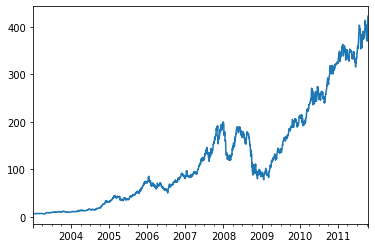

In [267]:
close_px['AAPL'].plot()

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


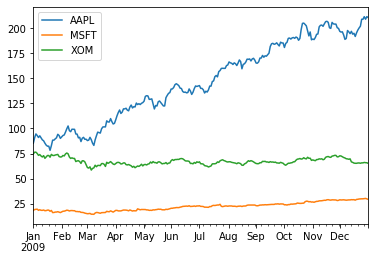

In [268]:
close_px.ix['2009'].plot()

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


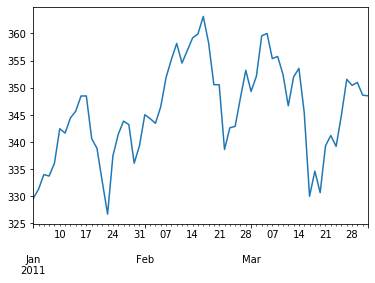

In [269]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.
/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


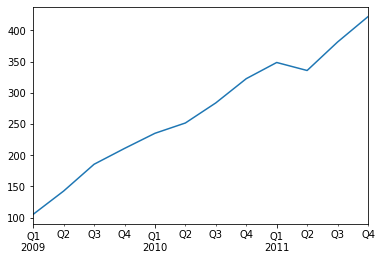

In [270]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

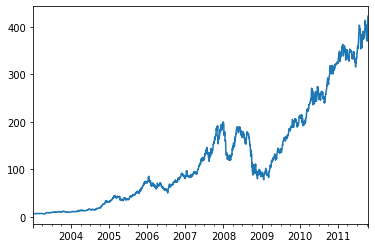

In [271]:
close_px.AAPL.plot()

In [272]:
pd.rolling_mean(close_px.AAPL, 250).plot()

AttributeError: module 'pandas' has no attribute 'rolling_mean'

AttributeError: module 'pandas' has no attribute 'rolling_std'